1728839185.194238: Called function ImageDataset.__init__ with following information:
   args:   ['<utils.dataset_utils.ImageDataset object at 0x1571f4d90>']
   kwargs: ['directory_path = pistachio_dataset/data/Kirmizi_Pistachio', 'img_size = (32, 32)']


/Users/aniket/PycharmProjects/windDM-diffusers/.venv/lib/python3.11/site-packages/accelerate/accelerator.py:443: UserWarning: `log_with=tensorboard` was passed but no supported trackers are currently installed.
  warnings.warn(f"`log_with={log_with}` was passed but no supported trackers are currently installed.")


1728839188.113354: Called function MasterModel.load_from_stub with following information:
   args:   ['<core.master_model.MasterModel object at 0x174b0fad0>']
   kwargs: []


/Users/aniket/PycharmProjects/windDM-diffusers/.venv/lib/python3.11/site-packages/accelerate/checkpointing.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimizer_st

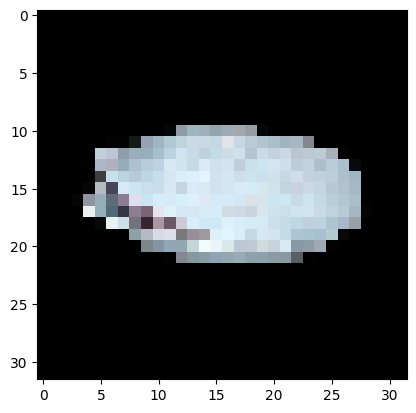

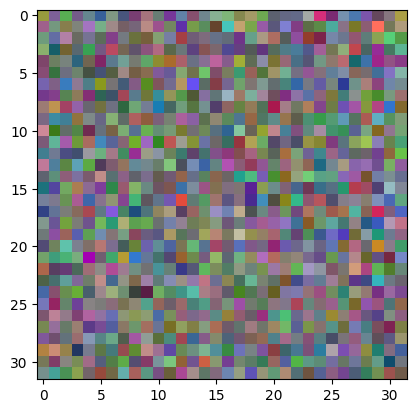

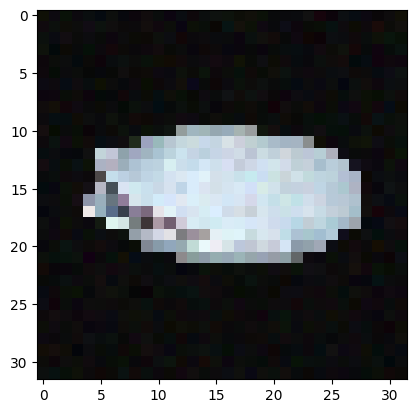

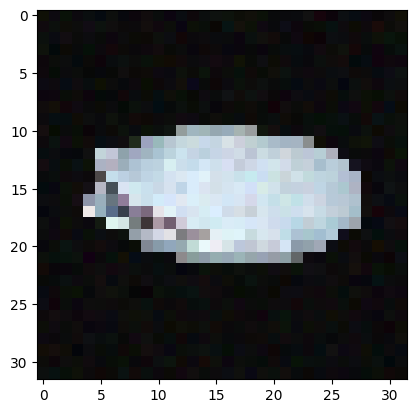

30 torch.Size([1, 3, 32, 32])
29 torch.Size([1, 3, 32, 32])
28 torch.Size([1, 3, 32, 32])
27 torch.Size([1, 3, 32, 32])
26 torch.Size([1, 3, 32, 32])
25 torch.Size([1, 3, 32, 32])
24 torch.Size([1, 3, 32, 32])
23 torch.Size([1, 3, 32, 32])
22 torch.Size([1, 3, 32, 32])
21 torch.Size([1, 3, 32, 32])


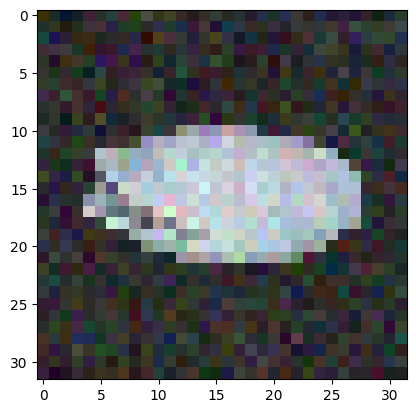

20 torch.Size([1, 3, 32, 32])
19 torch.Size([1, 3, 32, 32])
18 torch.Size([1, 3, 32, 32])
17 torch.Size([1, 3, 32, 32])
16 torch.Size([1, 3, 32, 32])
15 torch.Size([1, 3, 32, 32])
14 torch.Size([1, 3, 32, 32])
13 torch.Size([1, 3, 32, 32])
12 torch.Size([1, 3, 32, 32])
11 torch.Size([1, 3, 32, 32])


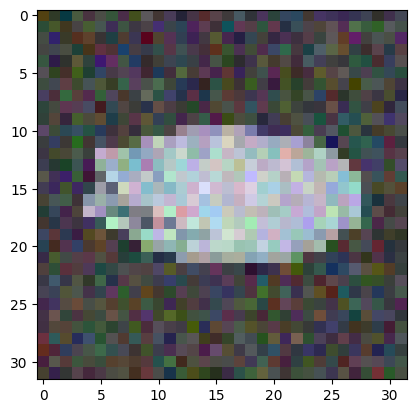

10 torch.Size([1, 3, 32, 32])
9 torch.Size([1, 3, 32, 32])
8 torch.Size([1, 3, 32, 32])
7 torch.Size([1, 3, 32, 32])
6 torch.Size([1, 3, 32, 32])
5 torch.Size([1, 3, 32, 32])
4 torch.Size([1, 3, 32, 32])
3 torch.Size([1, 3, 32, 32])
2 torch.Size([1, 3, 32, 32])
1 torch.Size([1, 3, 32, 32])


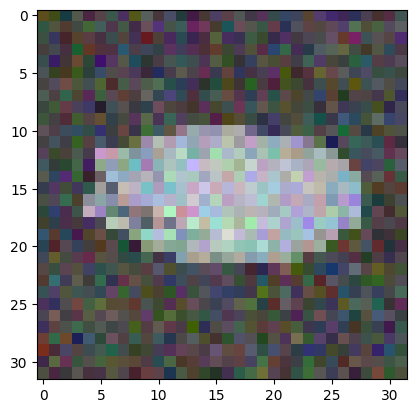

torch.Size([1, 3, 32, 32])


In [1]:
import utils
import torch
from core import UNet2D, MasterModel, TrainingConfig


device = 'mps' if torch.backends.mps.is_available() else 'cpu'

# Initialize:
images = utils.ImageDataset(directory_path="pistachio_dataset/data/Kirmizi_Pistachio",
                            img_size=(32, 32))
model = UNet2D()
training_config = TrainingConfig(num_train_epochs=2)
master_model = MasterModel(model=model.model,
                           training_config=training_config,
                           train_dataset=images,
                           stub_path="stubs/diffusion-pistachio-32/model_trained_3")

# Information for denoising:
start_denoise_step = 30
num_denoising_steps = 30
denoising_step = - start_denoise_step // num_denoising_steps

this_image = images[0].unsqueeze(0).to(dtype=torch.float32)
img, _ = utils.ImageUtils.plot_torch(this_image)

noise = torch.randn(this_image.shape, device=this_image.device)
img, _ = utils.ImageUtils.plot_torch(noise)

noisy = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
img, _ = utils.ImageUtils.plot_torch(noisy)

denoised = master_model.sampler.add_noise(this_image, noise, torch.Tensor([start_denoise_step]).long())
count = 0
# Denoising loop
for i in range(start_denoise_step, 0, denoising_step):
    if count % 10 == 0:
        denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
    denoised = master_model.forward(noisy, torch.Tensor([i]), predict_denoised=True, device=device)
    print(i, denoised.shape)
    noisy = denoised
    count += 1

denoised_img, _ = utils.ImageUtils.plot_torch(denoised)
print(denoised.shape)
